# Notebook Setup

This line is required to display the plots in the notebook

In [1]:
%matplotlib inline

# Plot setup
This line disables autoscroll so that all the plots can be seen

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Definitions and Functions

Imports the libraries and defines the functions we will be using.

In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap
import pandas as pd
plt.style.use('ggplot')
from scipy.interpolate import interp1d
import struct
import datetime

# Load the data

In [7]:
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('sorted_test.csv')

In [8]:
pd.options.display.max_columns = 999
df_train.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,m7478.68,m7476.75,m7474.82,m7472.89,m7470.97,m7469.04,m7467.11,m7465.18,m7463.25,m7461.32,m7459.39,m7457.47,m7455.54,m7453.61,m7451.68,m7449.75,m7447.82,m7445.89,m7443.97,m7442.04,m7440.11,m7438.18,m7436.25,m7434.32,m7432.4,m7430.47,m7428.54,m7426.61,m7424.68,m7422.75,m7420.82,m7418.9,m7416.97,m7415.04,m7413.11,m7411.18,m7409.25,m7407.33,m7405.4,m7403.47,m7401.54,m7399.61,m7397.68,m7395.75,m7393.83,m7391.9,m7389.97,m7388.04,m7386.11,m7384.18,m7382.25,m7380.33,m7378.4,m7376.47,m7374.54,m7372.61,m7370.68,m7368.76,m7366.83,m7364.9,m7362.97,m7361.04,m7359.11,m7357.18,m7355.26,m7353.33,m7351.4,m7349.47,m7347.54,m7345.61,m7343.68,m7341.76,m7339.83,m7337.9,m7335.97,m7334.04,m7332.11,m7330.19,m7328.26,m7326.33,m7324.4,m7322.47,m7320.54,m7318.61,m7316.69,m7314.76,m7312.83,m7310.9,m7308.97,m7307.04,m7305.12,m7303.19,m7301.26,m7299.33,m7297.4,m7295.47,m7293.54,m7291.62,m7289.69,m7287.76,m7285.83,m7283.9,m7281.97,m7280.04,m7278.12,m7276.19,m7274.26,m7272.33,m7270.4,m7268.47,m7266.55,m7264.62,m7262.69,m7260.76,m7258.83,m7256.9,m7254.97,m7253.05,m7251.12,m7249.19,m7247.26,m7245.33,m7243.4,m7241.48,m7239.55,m7237.62,m7235.69,m7233.76,m7231.83,m7229.9,m7227.98,m7226.05,m7224.12,m7222.19,m7220.26,m7218.33,m7216.4,m7214.48,m7212.55,m7210.62,m7208.69,m7206.76,m7204.83,m7202.91,m7200.98,m7199.05,m7197.12,m7195.19,m7193.26,m7191.33,m7189.41,m7187.48,m7185.55,m7183.62,m7181.69,m7179.76,m7177.83,m7175.91,m7173.98,m7172.05,m7170.12,m7168.19,m7166.26,m7164.34,m7162.41,m7160.48,m7158.55,m7156.62,m7154.69,m7152.76,m7150.84,m7148.91,m7146.98,m7145.05,m7143.12,m7141.19,m7139.27,m7137.34,m7135.41,m7133.48,m7131.55,m7129.62,m7127.69,m7125.77,m7123.84,m7121.91,m7119.98,m7118.05,m7116.12,m7114.19,m7112.27,m7110.34,m7108.41,m7106.48,m7104.55,m7102.62,m7100.7,m7098.77,m7096.84,m7094.91,m7092.98,m7091.05,m7089.12,m7087.2,m7085.27,m7083.34,m7081.41,m7079.48,m7077.55,m7075.62,m7073.7,m7071.77,m7069.84,m7067.91,m7065.98,m7064.05,m7062.13,m7060.2,m7058.27,m7056.34,m7054.41,m7052.48,m7050.55,m7048.63,m7046.7,m7044.77,m7042.84,m7040.91,m7038.98,m7037.06,m7035.13,m7033.2,m7031.27,m7029.34,m7027.41,m7025.48,m7023.56,m7021.63,m7019.7,m7017.77,m7015.84,m7013.91,m7011.98,m7010.06,m7008.13,m7006.2,m7004.27,m7002.34,m7000.41,m6998.49,m6996.56,m6994.63,m6992.7,m6990.77,m6988.84,m6986.91,m6984.99,m6983.06,m6981.13,m6979.2,m6977.27,m6975.34,m6973.42,m6971.49,m6969.56,m6967.63,m6965.7,m6963.77,m6961.84,m6959.92,m6957.99,m6956.06,m6954.13,m6952.2,m6950.27,m6948.34,m6946.42,m6944.49,m6942.56,m6940.63,m6938.7,m6936.77,m6934.85,m6932.92,m6930.99,m6929.06,m6927.13,m6925.2,m6923.27,m6921.35,m6919.42,m6917.49,m6915.56,m6913.63,m6911.7,m6909.77,m6907.85,m6905.92,m6903.99,m6902.06,m6900.13,m6898.2,m6896.28,m6894.35,m6892.42,m6890.49,m6888.56,m6886.63,m6884.7,m6882.78,m6880.85,m6878.92,m6876.99,m6875.06,m6873.13,m6871.21,m6869.28,m6867.35,m6865.42,m6863.49,m6861.56,m6859.63,m6857.71,m6855.78,m6853.85,m6851.92,m6849.99,m6848.06,m6846.13,m6844.21,m6842.28,m6840.35,m6838.42,m6836.49,m6834.56,m6832.64,m6830.71,m6828.78,m6826.85,m6824.92,m6822.99,m6821.06,m6819.14,m6817.21,m6815.28,m6813.35,m6811.42,m6809.49,m6807.57,m6805.64,m6803.71,m6801.78,m6799.85,m6797.92,m6795.99,m6794.07,m6792.14,m6790.21,m6788.28,m6786.35,m6784.42,m6782.49,m6780.57,m6778.64,m6776.71,m6774.78,m6772.85,m6770.92,m6769,m6767.07,m6765.14,m6763.21,m6761.28,m6759.35,m6757.42,m6755.5,m6753.57,m6751.64,m6749.71,m6747.78,m6745.85,m6743.92,m6742,m6740.07,m6738.14,m6736.21,m6734.28,m6732.35,m6730.43,m6728.5,m6726.57,m6724.64,m6722.71,m6720.78,m6718.85,m6716.93,m6715,m6713.07,m6711.14,m6709.21,m6707.28,m6705.36,m6703.43,m6701.5,m6699.57,m6697.64,m6695.71,m6693.78,m6691.86,m6689.93,m6688,m6686.07,m6684.14,m6682.21,m6680.28,m6678.36,m6676.43,m6674.5,m6672.57,m6670.64,m6668.71,m6666.79,m6664.86,m6662.93,m6661,m6659.07,m6657.14,m6655.21,m6653.29,m6651.36,m6649.43,m6647.5,m6645.57,m6643.64,m6641.72,m6639.79,m6637.86,m6635.93,m6634,m6632.07,m

# Data Exploration


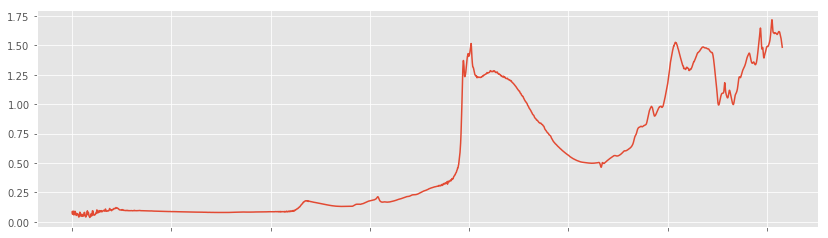

In [19]:
lst_spectrum = [col for col in df_train.columns if 'm' in col]
plt.figure(figsize=(14,4))
df_test.loc[2,lst_spectrum].plot()

Check out https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.dtypes.html#arrays-dtypes-constructing for more details on types

# Read the D6 file

In [10]:
dfD6 = pd.read_csv(os.path.join(strDataFolder, "D6_Plain.csv"))
dfD6

,Sense Pt Id,Offset_deg,Press04mA,Press20mA,ATM,Cylinder,CE,Bore,Stroke,Crod,NameClear
0,1,-237,0,2000,14.696,Cylinder 1,0,13.0,15,39,23.639
1,2,-237,0,2000,14.696,Cylinder 1,1,13.0,15,39,12.409
2,3,-297,0,1000,14.696,Cylinder 2,0,16.5,15,39,14.956
3,4,-297,0,1000,14.696,Cylinder 2,1,16.5,15,39,6.403
4,5,-357,0,3000,14.696,Cylinder 3,0,9.5,15,39,44.573
5,6,-357,0,3000,14.696,Cylinder 3,1,9.5,15,39,21.302
6,7,0,0,0,14.696,Not Configured,0,0.0,0,0,0.000
7,8,0,0,0,14.696,Not Configured,0,0.0,0,0,0.000
8,9,0,0,0,14.696,Not Configured,0,0.0,0,0,0.000
9,10,0,0,0,14.696,Not Configured,0,0.0,0,0,0.000


# Read the trend data

I am using the setup1.csv created by MD Export for point ID's. These don't match what is listed in Windrock MD trend point list.

In [11]:
#dfTrendPtList = pd.read_csv(os.path.join(strDataFolder, "HP2-A Trend Point List.csv"))
dfTrendPtList = pd.read_csv(os.path.join(strDataFolder, "setup1.csv"), 
                      header=None, names=['ID', 'Desc01', 'Desc02', 'Desc03', 'Units', 'Desc05', 'Desc06'])
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(dfTrendPtList)
dfTrendPtList.head(15)

,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
0,32,Comp 1 H - Z discharge,Comp 1 H-Z dis,Reported value - Compressor - Cyl. End,NaN,NaN,NaN
1,33,Comp 1 H - Z suction,Comp 1 H-Z suc,Reported value - Compressor - Cyl. End,NaN,NaN,NaN
2,34,Comp 1 H - Z standard,Comp 1 H-Z standard,Reported value - Compressor - Cyl. End,NaN,NaN,NaN
3,66,Comp 1 C - Z discharge,Comp 1 C-Z dis,Reported value - Compressor - Cyl. End,NaN,NaN,NaN
4,67,Comp 1 C - Z suction,Comp 1 C-Z suc,Reported value - Compressor - Cyl. End,NaN,NaN,NaN
5,68,Comp 1 C - Z standard,Comp 1 C-Z standard,Reported value - Compressor - Cyl. End,NaN,NaN,NaN
6,35,Comp 1 H - K,Comp 1 H-K,Reported value - Compressor - Cyl. End,NaN,NaN,NaN
7,69,Comp 1 C - K,Comp 1 C-K,Reported value - Compressor - Cyl. End,NaN,NaN,NaN
8,100,Comp 2 H - Z discharge,Comp 2 H-Z dis,Reported value - Compressor - Cyl. End,NaN,NaN,NaN
9,101,Comp 2 H - Z suction,Comp 2 H-Z suc,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


In [12]:
dfTrend = pd.read_csv(os.path.join(strDataFolder, "TrendData.csv"), 
                      header=None, names=['ID', 'DateTime', 'Value'], 
                      dtype={'ID':np.int32, 'DateTime':object, 'Value':np.float32})

In [13]:
dfTrend.head(20)

,ID,DateTime,Value
0,32,20141201105959,-1000000.0
1,33,20141201105959,-1000000.0
2,34,20141201105959,-1000000.0
3,66,20141201105959,-1000000.0
4,67,20141201105959,-1000000.0
5,68,20141201105959,-1000000.0
6,35,20141201105959,-1000000.0
7,69,20141201105959,-1000000.0
8,100,20141201105959,-1000000.0
9,101,20141201105959,-1000000.0


In [14]:
lstTemp = dfTrend.ID.unique()
print(type(lstTemp))
for id in lstTemp:
    display(dfTrendPtList[dfTrendPtList['ID']==id])

<class 'numpy.ndarray'>


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
0,32,Comp 1 H - Z discharge,Comp 1 H-Z dis,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
1,33,Comp 1 H - Z suction,Comp 1 H-Z suc,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
2,34,Comp 1 H - Z standard,Comp 1 H-Z standard,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
3,66,Comp 1 C - Z discharge,Comp 1 C-Z dis,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
4,67,Comp 1 C - Z suction,Comp 1 C-Z suc,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
5,68,Comp 1 C - Z standard,Comp 1 C-Z standard,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
6,35,Comp 1 H - K,Comp 1 H-K,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
7,69,Comp 1 C - K,Comp 1 C-K,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
8,100,Comp 2 H - Z discharge,Comp 2 H-Z dis,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
9,101,Comp 2 H - Z suction,Comp 2 H-Z suc,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
10,102,Comp 2 H - Z standard,Comp 2 H-Z standard,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
11,134,Comp 2 C - Z discharge,Comp 2 C-Z dis,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
12,135,Comp 2 C - Z suction,Comp 2 C-Z suc,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
13,136,Comp 2 C - Z standard,Comp 2 C-Z standard,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
14,103,Comp 2 H - K,Comp 2 H-K,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
15,137,Comp 2 C - K,Comp 2 C-K,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
16,168,Comp 3 H - Z discharge,Comp 3 H-Z dis,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
17,169,Comp 3 H - Z suction,Comp 3 H-Z suc,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
18,170,Comp 3 H - Z standard,Comp 3 H-Z standard,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
19,202,Comp 3 C - Z discharge,Comp 3 C-Z dis,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
20,203,Comp 3 C - Z suction,Comp 3 C-Z suc,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
21,204,Comp 3 C - Z standard,Comp 3 C-Z standard,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
22,171,Comp 3 H - K,Comp 3 H-K,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
23,205,Comp 3 C - K,Comp 3 C-K,Reported value - Compressor - Cyl. End,NaN,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
24,256,Comp 1 Suction Temp,Comp 1 Suc Temp,Modbus temperature input sensor point,°F,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
25,257,Comp 2 Suction Temp,Comp 2 Suc Temp,Modbus temperature input sensor point,°F,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
26,258,Comp 3 Suction Temp,Comp 3 Suc Temp,Modbus temperature input sensor point,°F,NaN,NaN


,ID,Desc01,Desc02,Desc03,Units,Desc05,Desc06
27,2,Compressor - Speed,Comp-Speed,Reported value - Compressor - Overall,RPM,NaN,NaN


# Aggregate the data

The data from MDExport is mixed up across times and point ID. For each cylinder, create a dataframe of static data

This function generates plots of the data

In [15]:
def plotTrend(dfTrendCyl, strColName):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(14,7))
    
    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    
    ax.plot(dfTrendCyl['DateTime'], dfTrendCyl[strColName])
    ax.set_title(strColName)
    years = mdates.YearLocator()   # every year   
    yearsFmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
   


In [16]:
def assy_trend(dfTrendCyl, idZ_std=34, idZ_Suct=33, idZ_Dish=32, idK=35, idTemp_Suct=256):
    
    # Compressibilies
    dfTrendCyl = dfTrend.loc[dfTrend.loc[:,'ID']==idZ_std,:].copy()
    dfTrendCyl['DateTime']= pd.to_datetime(dfTrendCyl.loc[:,'DateTime'], format = '%Y%m%d%H%M%S')
    dfTrendCyl = dfTrendCyl.rename(index=str, columns={"Value": "Z_std"})
    dTemp = np.array(dfTrend.loc[dfTrend.loc[:,'ID']==idZ_Suct,'Value'])
    dfTrendCyl['Z_Suct'] = pd.Series(dTemp, index=dfTrendCyl.index)
    dTemp = np.array(dfTrend.loc[dfTrend.loc[:,'ID']==idZ_Dish,'Value'])
    dfTrendCyl['Z_Dish'] = pd.Series(dTemp, index=dfTrendCyl.index)
    
    
    # K value
    dTemp = np.array(dfTrend.loc[dfTrend.loc[:,'ID']==idK,'Value'])
    dfTrendCyl['K'] = pd.Series(dTemp, index=dfTrendCyl.index)
    
    # Suction temperature
    dTemp = np.array(dfTrend.loc[dfTrend.loc[:,'ID']==idTemp_Suct,'Value'])
    dfTrendCyl['Temp_Suct'] = pd.Series(dTemp, index=dfTrendCyl.index)
    
    # Looks like bad data gets flagged as -1000000.0, replace with NaN, than ffill and bfill
    dfTrendCyl = dfTrendCyl.replace(-1000000.0, np.nan)
    dfTrendCyl = dfTrendCyl.fillna(method='bfill')
    
    return dfTrendCyl

Subset the data for cylinder #1

In [17]:
dfTrendData = {}
dfTrendData[0] = pd.DataFrame()
dfTrendData[0]= assy_trend(dfTrendData[0], idZ_std=34, idZ_Suct=33, idZ_Dish=32, idK=35, idTemp_Suct=256)

In [18]:
dfTrendData[0].head()

,ID,DateTime,Z_std,Z_Suct,Z_Dish,K,Temp_Suct
2,34,2014-12-01 10:59:59,1.00053,1.01952,1.0393,1.40115,0.000013
30,34,2014-12-01 11:00:59,1.00053,1.01952,1.0393,1.40115,0.000013
58,34,2014-12-01 11:01:59,1.00053,1.01952,1.0393,1.40115,0.000013
86,34,2014-12-01 11:02:59,1.00053,1.01952,1.0393,1.40115,0.000013
114,34,2014-12-01 11:03:59,1.00053,1.01952,1.0393,1.40115,0.000013


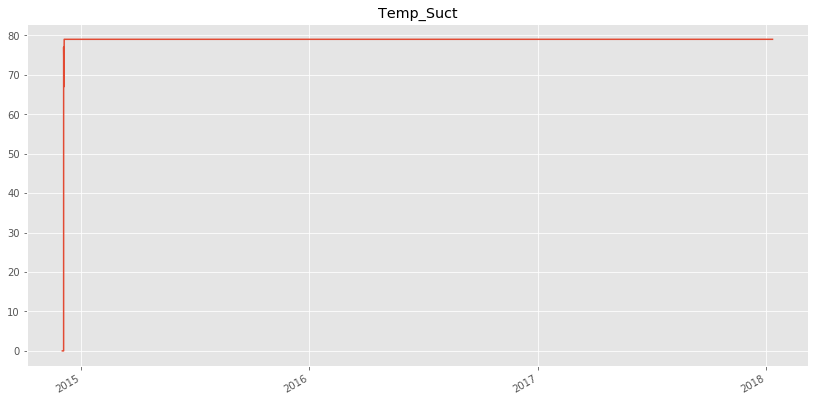

In [19]:
plotTrend(dfTrendData[0], 'Temp_Suct')

Subset the data for cylinder #2

In [20]:
dfTrendData[1] = pd.DataFrame()
dfTrendData[1]= assy_trend(dfTrendData[1], idZ_std=102, idZ_Suct=101, idZ_Dish=100, idK=103, idTemp_Suct=257)

In [21]:
dfTrendData[1].head()

,ID,DateTime,Z_std,Z_Suct,Z_Dish,K,Temp_Suct
10,102,2014-12-01 10:59:59,1.00053,1.00697,1.01623,1.40038,186.0
38,102,2014-12-01 11:00:59,1.00053,1.00697,1.01623,1.40038,186.0
66,102,2014-12-01 11:01:59,1.00053,1.00697,1.01623,1.40038,186.0
94,102,2014-12-01 11:02:59,1.00053,1.00697,1.01623,1.40038,186.0
122,102,2014-12-01 11:03:59,1.00053,1.00697,1.01623,1.40038,186.0


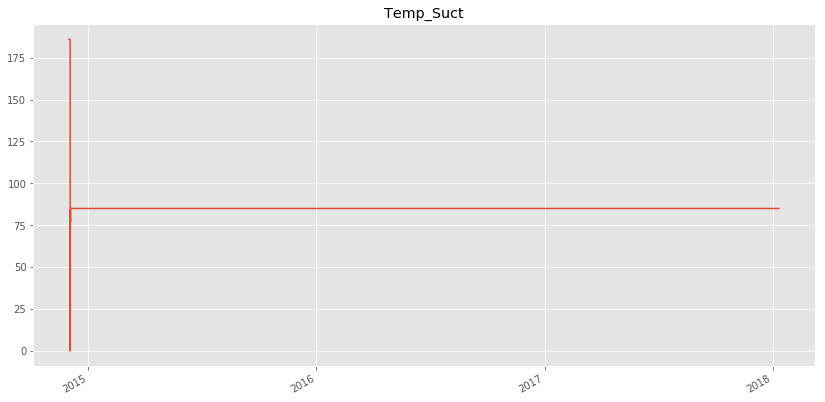

In [22]:
 plotTrend(dfTrendData[1], 'Temp_Suct')

Subset the data for cylinder #3

In [23]:
dfTrendData[2] = pd.DataFrame()
dfTrendData[2]= assy_trend(dfTrendData[2], idZ_std=170, idZ_Suct=169, idZ_Dish=168, idK=171, idTemp_Suct=258)

In [24]:
dfTrendData[2].head()

,ID,DateTime,Z_std,Z_Suct,Z_Dish,K,Temp_Suct
18,170,2014-12-01 10:59:59,1.00053,1.04416,1.08561,1.40151,0.000013
46,170,2014-12-01 11:00:59,1.00053,1.04416,1.08561,1.40151,0.000013
74,170,2014-12-01 11:01:59,1.00053,1.04416,1.08561,1.40151,0.000013
102,170,2014-12-01 11:02:59,1.00053,1.04416,1.08561,1.40151,0.000013
130,170,2014-12-01 11:03:59,1.00053,1.04416,1.08561,1.40151,0.000013


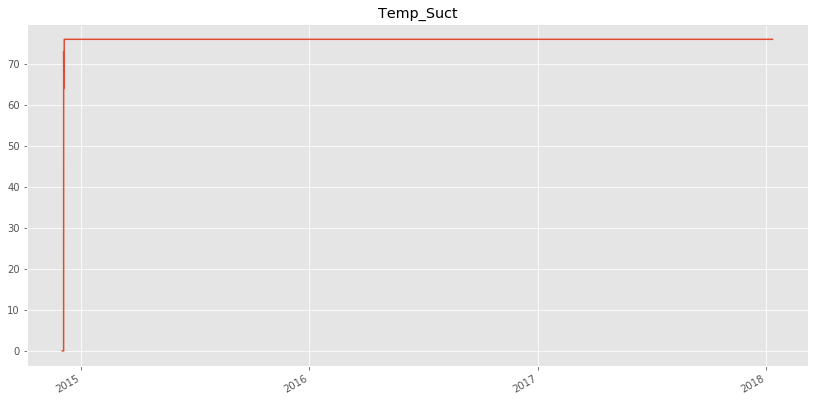

In [25]:
 plotTrend(dfTrendData[2], 'Temp_Suct')

# Parse the index file

The *.?&& file is the index of the data file. It gives the timestamp, sensor point ID, run number, number of cycles, and offset (within the data file) for each record.

For this phase we will create a table with the 38 char data and the extracted features.

This format for date gets used often

In [26]:
strIndexDataFormat = '%Y-%m-%d %H:%M:%S'

In [27]:
dfIndex = pd.DataFrame()
for idx, row in dfFileList.iterrows():
    strFileName = row['IndexFiles']
    strFileWithPath = os.path.join(strDataFolder, strFileName); 
    fh = open(strFileWithPath, 'rb')
    iFileBytes = int(os.path.getsize(strFileWithPath));
    iSets = int(iFileBytes/38);
    for idx in range(1,iSets):
        strTemp = fh.read(38);
        iTimeSerial = int(strTemp[5:15]);
        if (iTimeSerial < 1000000):
            iTimeSerial = 1000000
        iPointID = int(strTemp[:4]);
        dDegOffset = dfD6[dfD6['Sense Pt Id']==iPointID]['Offset_deg'].iloc[0]
        
        dfIndex = dfIndex.append( {'strFileIndex':strFileName,
                        'iSize_bytes':iFileBytes,
                        'DataFiles':row['DataFiles'],
                        'Cell':strTemp,
                        'SensePtId':iPointID,
                        'Offset_deg':dDegOffset,
                        'DateTime':datetime.datetime.fromtimestamp(iTimeSerial).strftime(strIndexDataFormat),
                        'Offset_bytes':int(strTemp[16:28])},
                        ignore_index=True)
    fh.close

In [28]:
dfIndex

,Cell,DataFiles,DateTime,Offset_bytes,Offset_deg,SensePtId,iSize_bytes,strFileIndex
0,b' 1 1 1 1 1 1',S14S1201.S$$,1970-01-12 05:46:40,1.0,-237.0,1.0,76.0,S14S1201.S&&
1,b' 1 1 1 1 1 1',S14S1202.S$$,1970-01-12 05:46:40,1.0,-237.0,1.0,3078.0,S14S1202.S&&
2,b' 8 1417557599 0 1 1 1',S14S1202.S$$,2014-12-02 13:59:59,0.0,0.0,8.0,3078.0,S14S1202.S&&
3,b' 1 1417561199 28 3 1 1',S14S1202.S$$,2014-12-02 14:59:59,28.0,-237.0,1.0,3078.0,S14S1202.S&&
4,b' 2 1417561199 794 3 1 1',S14S1202.S$$,2014-12-02 14:59:59,794.0,-237.0,2.0,3078.0,S14S1202.S&&
5,b' 3 1417561199 1560 3 1 1',S14S1202.S$$,2014-12-02 14:59:59,1560.0,-297.0,3.0,3078.0,S14S1202.S&&
6,b' 4 1417561199 2326 3 1 1',S14S1202.S$$,2014-12-02 14:59:59,2326.0,-297.0,4.0,3078.0,S14S1202.S&&
7,b' 5 1417561199 3092 3 1 1',S14S1202.S$$,2014-12-02 14:59:59,3092.0,-357.0,5.0,3078.0,S14S1202.S&&
8,b' 6 1417561199 3858 3 1 1',S14S1202.S$$,2014-12-02 14:59:59,3858.0,-357.0,6.0,3078.0,S14S1202.S&&
9,b' 8 1417561199 4624 1 1 1',S14S1202.S$$,2014-12-02 14:59:59,4624.0,0.0,8.0,3078.0,S14S1202.S&&


# Helper functions for the index and D6 files

In [29]:
def getFrameIndex(idxIndexFile):
    iSensePtId = int(dfIndex['SensePtId'][idxIndexFile])
    idxDF = 0
    
    if (iSensePtId == 3 or iSensePtId == 4):
        idxDF = 1
        
    if (iSensePtId == 5 or iSensePtId == 6):
        idxDF = 2
        
    return idxDF

# Test harness
#idxDF = getFrameIndex(idxIndexFile=3)
#print(idxDF)
#idxDF = getFrameIndex(idxIndexFile=4)
#print(idxDF)
#idxDF = getFrameIndex(idxIndexFile=5)
#print(idxDF)

In [30]:
def getDateFromIndex(idxIndexFile):
    strIndexDate = dfIndex['DateTime'][idxIndexFile]
    return datetime.datetime.strptime(strIndexDate, strIndexDataFormat), strIndexDate

# Test harness
#print(getDateFromIndex(idxIndexFile=3))

In [31]:
def getTrendRow(idxDF, dtIndex):
    return dfTrendData[idxDF][dfTrendData[idxDF]['DateTime']>dtIndex].head(1).copy()

# Test harness
#dtIndexDate, strIndexDate = getDateFromIndex(idxIndexFile=3)
#getTrendRow(0, dtIndexDate)

In [32]:
def getZ_std(idxIndexFile):
    dtIndexDate, strIndexDate = getDateFromIndex(idxIndexFile)
    return getTrendRow(getFrameIndex(idxIndexFile), dtIndexDate)['Z_std'][0]

# Test harness
#print(getZ_std(3))

In [33]:
def getZSuct(idxIndexFile):
    return 1.019

In [34]:
def getZDish(idxIndexFile):
    return 1.039

In [35]:
def getK(idxIndexFile):
    return 1.4

In [36]:
def getCrankEnd(iPointID):
    bCrankEnd = bool(dfD6[dfD6['Sense Pt Id']==iPointID]['CE'].iloc[0])
    return bCrankEnd

In [37]:
def getBaro(iPointID):
    dBaro = float(dfD6[dfD6['Sense Pt Id']==iPointID]['ATM'].iloc[0])
    return dBaro

# Parse the waveform files

Loop through the waveform files, output to a .csv

In [38]:
dfFileList['DataFiles'][3]

'S14S1204.S$$'

In [39]:
dfIndex['Offset_bytes'][3]

28.0

A plotting function that gets called by the test harness

In [70]:
def plotRecipAngle(dPress_MD, dPress_bytes, idxIndexFile, strMain='MDExport', strAux='Byte-wise', 
                   strTitle='Pressure Vs. Crank Angle', bAdiab=True):
    
    # Pull the point id from the index file
    iPointID = getPointID(idxIndexFile)
    
    plt.figure(figsize=(14,7))
    dAngle = np.linspace(0,359,num=360);

    p1 = plt.plot(dAngle,dPress_MD)

    p2 = plt.plot(dAngle, dPress_bytes)
    
    dPressAdiabatic, dPressSuct_abs, dPressDish_abs = getAdiabaticCurve(dPress_bytes, idxIndexFile)
    dBaro = getBaro(iPointID)
    if bAdiab:
        p3 = plt.plot(dAngle, dPressAdiabatic-dBaro)

    plt.xlim(0,360)
    if bAdiab:
        plt.legend([strMain, strAux, 'Adiabatic'])
    else:
        plt.legend([strMain, strAux])
    plt.xticks(np.arange(0, 361, step=30));
    plt.xlabel('Crank Angle, Degrees');
    plt.ylabel('Pressure, PSIG')
    
    # These lines construct the header
    bCrankEnd = getCrankEnd(iPointID)
    strEnd = "HE"
    if bCrankEnd:
        strEnd = "CE"
    dtIndexDate, strIndexDate = getDateFromIndex(idxIndexFile)
    dZ_std = getZ_std(idxIndexFile)
    strHeader = " | " + strIndexDate + " | " + strEnd + " | P_Suct: {0:0.2f}".format(dPressSuct_abs-dBaro) + " PSIG" 
    strHeader = strHeader + " | P_Dish: {0:0.2f}".format(dPressDish_abs-dBaro) + " PSIG\n"
    strHeader = strHeader + "Z_std: {0:0.4f}".format(dZ_std) 

    plt.title(strTitle + strHeader)
    
    return dPressAdiabatic

Plotting in the displaced volume domain

In [71]:
def plotRecipVol(dPress_MD, dPress_bytes, idxIndexFile):
    
    # Throw the data to a file
    strFile = "Waveform"+str(idxIndexFile).zfill(4)+".csv"
    np.savetxt(strFile, dPress_bytes)
    
    plt.figure(figsize=(14,7))
    dDisp = getPistonDisp(idxIndexFile);

    p1 = plt.plot(dDisp,dPress_MD)

    p2 = plt.plot(dDisp, dPress_bytes)

    dPressAdiabatic, dPressSuct, dPressDish = getAdiabaticCurve(dPress_bytes, idxIndexFile)
    dBaro = float(dfD6[dfD6['Sense Pt Id']==iPointID]['ATM'].iloc[0]) 
    p3 = plt.plot(dDisp, dPressAdiabatic-dBaro)

    plt.xlim(0.0, 1.0)
    plt.legend(['MDExport', 'Byte-wise', 'Adiabatic'])
    plt.xticks(np.arange(0, 1, step=0.1));
    plt.xlabel('Displaced Volume, Percent');
    plt.ylabel('Pressure, PSIG')
    plt.title('Pressure Vs. Displaced Volume')

Generate the theoretical curve

In [72]:
def getAdiabaticCurve(dPress, idxIndexFile, bOverridePress=False, dPressSuct_abs=100, dPressDish_abs = 300):
    
    iPointID = getPointID(idxIndexFile)
    dStroke = float(dfD6[dfD6['Sense Pt Id']==iPointID]['Stroke'].iloc[0])
    dCrod = float(dfD6[dfD6['Sense Pt Id']==iPointID]['Crod'].iloc[0])
    theta_deg = np.linspace(0,359,num=360)
    bCrankEnd = getCrankEnd(iPointID)
    dBaro = getBaro(iPointID) 
    dK = getK(idxIndexFile)
    dClearance = float(dfD6[dfD6['Sense Pt Id']==iPointID]['NameClear'].iloc[0])/100.0
    
    dDisp = getdisp(dStroke/2, dCrod, theta_deg, bCrankEnd)
    dDispVol = dDisp/dStroke + dClearance
                      
    dPress = dPress + dBaro
    idxValveOpenSuct, idxValveOpenDish, idxValveCloseSuct, idxValveCloseDish, dVESuct, dVEDish = voleff(dPress, dDispVol, bCrankEnd)
    if bOverridePress == False:
        dPressSuct_abs = dPress[idxValveCloseSuct]
        dPressDish_abs = dPress[idxValveCloseDish]

    dPressAdiabatic = adiabatic(dDispVol, dK, bCrankEnd, dPressSuct_abs, dPressDish_abs)
    return dPressAdiabatic, dPressSuct_abs, dPressDish_abs              


Define extraction parameters. The samples per revolution should come from the index file, but I'm not sure which '1' is the sample per degree

In [73]:
dSamplesPerRev = 360;
dDataFileOffset = 26;
dOfffset_deg = -177;

Converting bit counts to engineering units depends on the sensor type. For a 4-20 mA sensor, 0 bits is 0 mA, and 16 bits is 20 mA.  Then the sensor point definition out of the protobuf file gives the sensor range: the low (engineering units at 4 mA) and high (engineering units at 20 mA) values. Then there are additional complications: power pressure may get pinned to manifold pressure, and the software may use saved sensor ranges out of the extra data file (.SDD file) instead of the current sensor ranges out of the current protobuf definition, and maybe some other wrinkles. I'd be more comfortable updating the export interface than trying to document all of our file format quirks then having someone duplicate all of them. Your choice, though.

Exploration around how to convert from ADC counts to engineering units

In [74]:
def getPressFrom_mA(dPress_04mA, dPress_20mA, dmA):
    m = (dPress_20mA-dPress_04mA)/16;
    return m*(dmA-4)+dPress_04mA

In [75]:
def get_mAFromPress(dPress_04mA, dPress_20mA, dPress):
    m = 16/(dPress_20mA-dPress_04mA);
    return m*(dPress-dPress_04mA)+4;

In [76]:
def ScalePressWaveform(dPress_bytes, dPress_04mA, dPress_20mA):
        dmA = 20*dPress_bytes/(np.power(2,16))
        return getPressFrom_mA(dPress_04mA, dPress_20mA, dmA)

This function gets used over and over

In [77]:
def getPointID(idxIndexFile):
    return int(dfIndex['SensePtId'][idxIndexFile])


This function pulls a waveform specified by a row of the dfIndex table

In [78]:
def getPressWaveform(idxIndexFile):
    
    # Get the index file information
    strFilePlusPath = os.path.join(strDataFolder, dfIndex['DataFiles'][idxIndexFile])
    fh = open(strFilePlusPath, 'rb')
    xEndAll_bytes = np.fromfile(fh, dtype=('b'))
    fh.close;
    iDataOffset = int(dfIndex['Offset_bytes'][idxIndexFile])
    dPress_bytes = struct.unpack_from('<360H', xEndAll_bytes, offset=(dDataFileOffset+iDataOffset-2))
    dDegOffset = int(dfIndex['Offset_deg'][idxIndexFile])
    dPress_bytes = np.roll(dPress_bytes, dDegOffset+1)
    
    # Get machine data (from the D6 file)
    iPointID = getPointID(idxIndexFile)
    dPress_04mA = float(dfD6[dfD6['Sense Pt Id']==iPointID]['Press04mA'].iloc[0])
    dPress_20mA = float(dfD6[dfD6['Sense Pt Id']==iPointID]['Press20mA'].iloc[0])
    
    # Correct the pressure curve to engineering units
    dPress_bytes = ScalePressWaveform (dPress_bytes, dPress_04mA, dPress_20mA)
    
    return dPress_bytes, dDegOffset  

Get the piston displacement curve

In [79]:
def getPistonDisp(idxIndexFile):
    iPointID = getPointID(idxIndexFile)
    dStroke = float(dfD6[dfD6['Sense Pt Id']==iPointID]['Stroke'].iloc[0])
    dCrod = float(dfD6[dfD6['Sense Pt Id']==iPointID]['Crod'].iloc[0])
    theta_deg = np.linspace(0,359,num=360)
    bCrankEnd = getCrankEnd(iPointID)

    dDisp = getdisp(dStroke/2, dCrod, theta_deg, bCrankEnd)
    dDisp = dDisp/dStroke
    return dDisp

# Data tests

Test this out for the first set of data. First pull in the reference data from MDExport, then the bytewise data

In [80]:
strFileValidate = strFilePlusPath = os.path.join(strDataFolder, 'Test.csv')
dfVal = pd.read_csv(strFileValidate)
dfVal = ScalePressWaveform(dfVal, 0, 2000)
dPress_MD = dfVal[0:360];

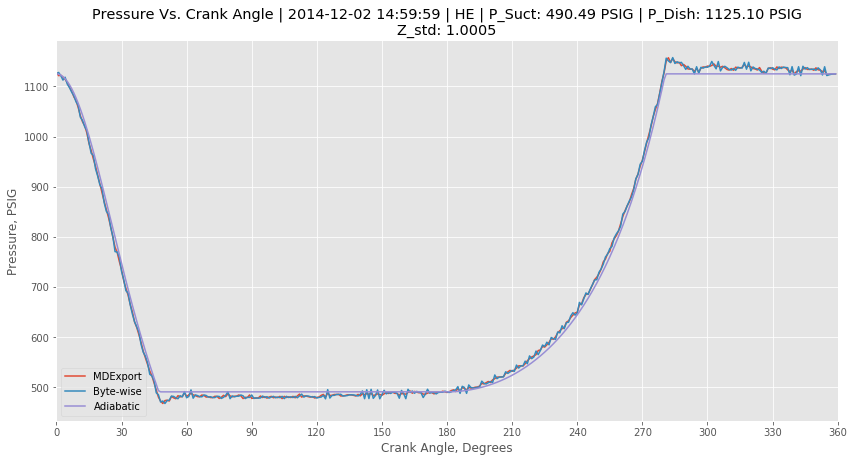

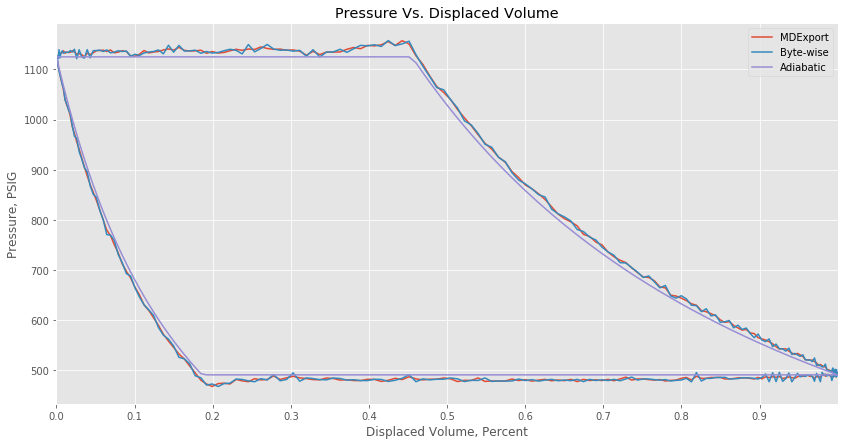

In [81]:
idxIndexFile = 3;
(dPress_bytes, dDegOffset) = getPressWaveform(idxIndexFile)
dPressAdiabatic = plotRecipAngle(np.roll(dPress_MD,dDegOffset+2), dPress_bytes, idxIndexFile)
plotRecipVol(np.roll(dPress_MD,dDegOffset+2), dPress_bytes, idxIndexFile)

Lets see if that works on the next data set (ID = 2, cylinder 1 CE)

In [82]:
strFileValidate = strFilePlusPath = os.path.join(strDataFolder, 'Test2.csv')
dfVal = pd.read_csv(strFileValidate)
dfVal = ScalePressWaveform(dfVal, 0, 2000)
dPress_MD = dfVal[0:360];

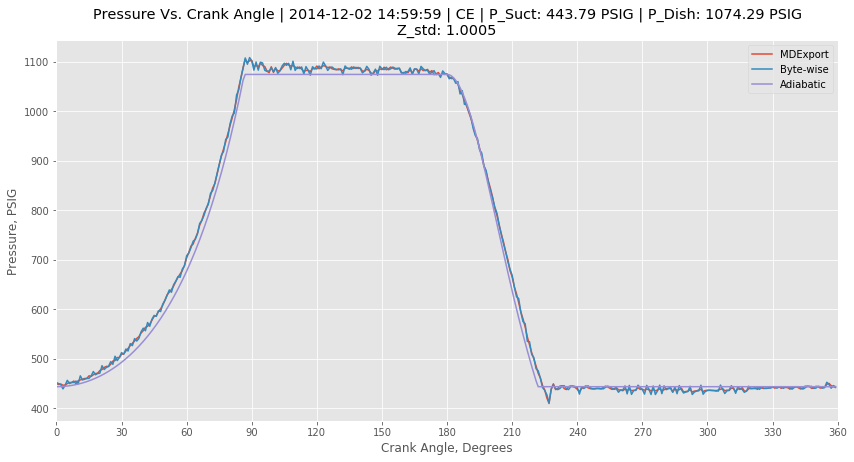

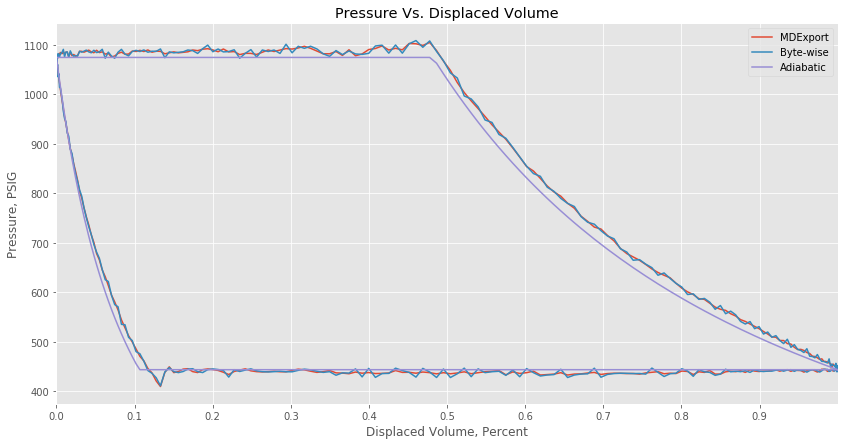

In [83]:
idxIndexFile = 4;
(dPress_bytes, dDegOffset) = getPressWaveform(idxIndexFile)
plotRecipAngle(np.roll(dPress_MD,dDegOffset+2), dPress_bytes, idxIndexFile)
plotRecipVol(np.roll(dPress_MD,dDegOffset+2), dPress_bytes, idxIndexFile)

Lets see if that works on the next data set (ID = 3, cylinder 2 HE)

In [84]:
strFileValidate = strFilePlusPath = os.path.join(strDataFolder, 'Test3.csv')
dfVal = pd.read_csv(strFileValidate)
dfVal = ScalePressWaveform(dfVal, 0, 1000)
dPress_MD = dfVal[0:360];

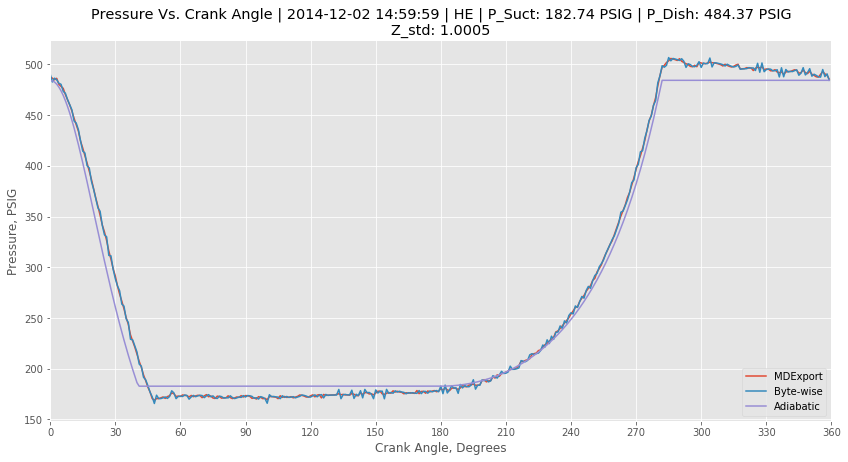

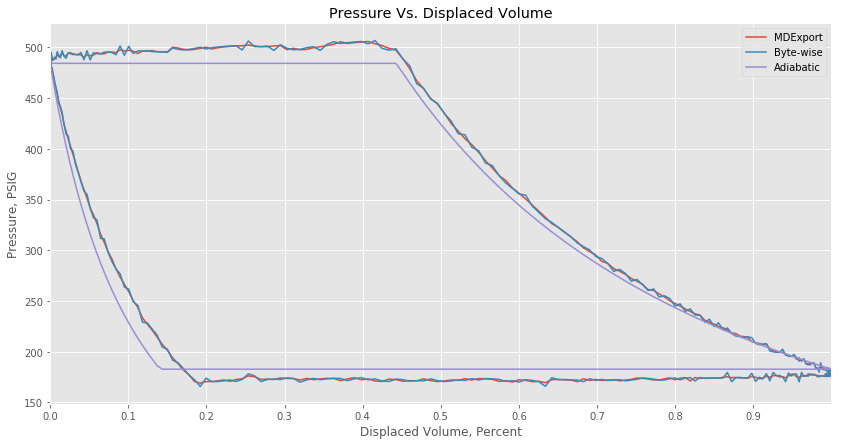

In [85]:
idxIndexFile = 5;
(dPress_bytes, dDegOffset) = getPressWaveform(idxIndexFile)
plotRecipAngle(np.roll(dPress_MD,dDegOffset+2), dPress_bytes, idxIndexFile)
plotRecipVol(np.roll(dPress_MD,dDegOffset+2), dPress_bytes, idxIndexFile)

Lets see if that works on the next data set (ID = 4, cylinder 2 CE)

In [86]:
strFileValidate = strFilePlusPath = os.path.join(strDataFolder, 'Test4.csv')
dfVal = pd.read_csv(strFileValidate)
dfVal = ScalePressWaveform(dfVal, 0, 1000)
dPress_MD = dfVal[0:360];

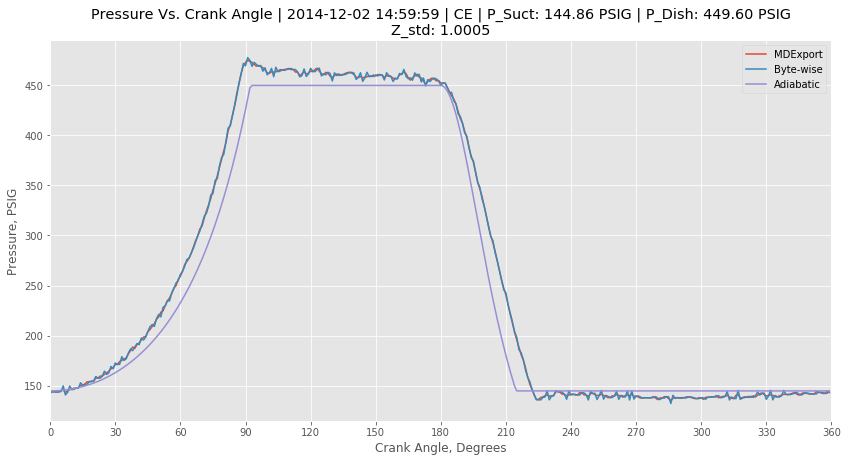

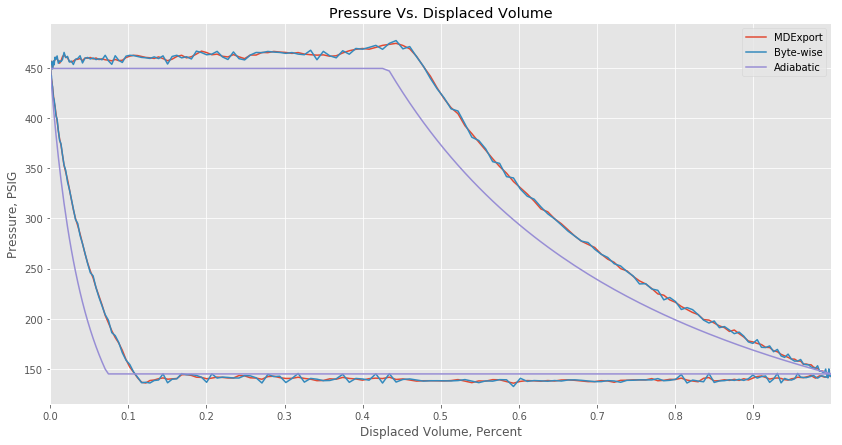

In [87]:
idxIndexFile = 6;
(dPress_bytes, dDegOffset) = getPressWaveform(idxIndexFile)
plotRecipAngle(np.roll(dPress_MD,dDegOffset+2), dPress_bytes, idxIndexFile)
plotRecipVol(np.roll(dPress_MD,dDegOffset+2), dPress_bytes, idxIndexFile)

# Thermo calcs

In [88]:
def flow_per_cycle(dPress, dPressSTP, dTemp, dTempSTP, dZ, dZstd, dVE, dDispVol):
    return (dPress/dPressSTP)*(dTempSTP/dTemp)*(dZstd/dZ)*dVE*dDispVol

In [89]:
def adiabatic_temp(dPressDish, dPressSuct, dTemp_Suct, dK):
    return dTemp_Suct*np.power((dPressDish/dPressSuct),(dK-1)/dK)

# Auto TDC Demonstration

In [96]:
def auto_tdc(idxIndexFile, iOffset=-18, iInterp = 1, bDebug=False, bDebug_Verbose=False):
    
    # Get the pressure data for this record
    (dPress, dDegOffset) = getPressWaveform(idxIndexFile)
    dPress = np.roll(dPress, iOffset)
    iSampleCount = len(dPress)
    
    # Define the number of samples for fine adjustment
    iSamplesTune = 10
    
    # Get the adiabatic pressure curve using 95% of max pressure and 105% of minimum pressure
    dPressDish = 0.95* np.max(dPress)
    dPressSuct = 1.05*np.min(dPress)
    bOverridePress = True
    dPressAdiabatic, dPressSuct_abs, dPressDish_abs  = getAdiabaticCurve(dPress, idxIndexFile, bOverridePress, dPressSuct, dPressDish)
    
    if bDebug:
        plotRecipAngle(dPress, dPressAdiabatic, idxIndexFile, strMain='As-found', strAux='Apx. Adiabatic', bAdiab=False)
    
    # ----------------------------------------------------------------------
    # Begin rough TDC location
    # ----------------------------------------------------------------------
    dCorrArray = np.zeros(len(dPress)*iInterp)
    dEndValue = 360.0-(360.0/float(iSampleCount*iInterp))
    iValues = np.linspace(0, dEndValue, (iInterp*iSampleCount))
    if bDebug_Verbose:
        print("length of iValues: {0:.0f}".format(len(iValues)))
    for idx in range(0,len(iValues)):
        dCorrArray[idx] = np.corrcoef(dPress, nonintshift(dPressAdiabatic, -iValues[idx])[0] )[0, 1]
    dAngleCorrected = iValues[np.argmax(dCorrArray)+1]
    dPress_corr_rough = nonintshift(dPress, dAngleCorrected)[0]
    
    if bDebug:
        plt.figure(figsize=(14,7))
        plt.plot(iValues, dCorrArray)
        plt.xticks(np.arange(0, 361, step=30));
        plt.xlabel('Offset, Degrees');
        plt.ylabel('Normalized correlation, -')
        plt.title('Normalized correlation Vs. Offset')

        
    # Plot the results
    print("Rough TDC Offset: {0:.2f} deg".format(dAngleCorrected))
    plotRecipAngle(dPress, dPress_corr_rough, idxIndexFile, strMain='As-found', strAux='Corrected', 
               strTitle='Pressure Vs. Crank Angle | Rough Correction: {0:.2f} deg'.format(dAngleCorrected), bAdiab=True)

    # ----------------------------------------------------------------------
    # Calculate the flow balance and indicated clearance curves
    # ----------------------------------------------------------------------
    iValues = range(-iSamplesTune,iSamplesTune)
    dClearanceDelta = np.zeros(len(iValues), dtype=np.float32)
    dFlowBalance = np.zeros(len(iValues), dtype=np.float32)
    dDisp = getPistonDisp(idxIndexFile)
    iPointID = getPointID(idxIndexFile)
    dK = getK(idxIndexFile)
    bCrankEnd = getCrankEnd(iPointID)
    if bCrankEnd:
        dDisp = 1-dDisp
    
    idxDelta = 0
    for idx in iValues:
        
        dPressRoll = np.roll(dPress_corr_rough, idx)
        idxValveOpenSuct, idxValveOpenDish, idxValveCloseSuct, idxValveCloseDish, dVESuct, dVEDish = voleff(dPressRoll, dDisp, bCrankEnd)
        dPressSuct = dPressRoll[idxValveCloseSuct]
        dPressDish = dPressRoll[idxValveCloseDish]
        dR = dPressDish/dPressSuct
        
        if bDebug_Verbose:
            print("K: {0:.5f}".format(dK))
            print("Suction VE: {0:.3f}".format(dVESuct))
            print("Discharge VE: {0:.3f}".format(dVEDish))
            print("Ratio: {0:.3f}".format(dR))

        bUseSuct = True
        dClearancePercent_Suct = clearance(dK, dVESuct, dVEDish, dR, bUseSuct)
        bUseSuct = False
        dClearancePercent_Dish = clearance(dK, dVESuct, dVEDish, dR, bUseSuct)
        
        dClearanceDelta[idxDelta] = abs(dClearancePercent_Suct - dClearancePercent_Dish)

        if bDebug_Verbose:
            print("dClearancePercent_Suct: {0:.3f}".format(dClearancePercent_Suct))
            print("dClearancePercent_Dish: {0:.3f}".format(dClearancePercent_Dish))
            print("dClearanceDelta: {0:.3f}".format(dClearanceDelta[idxDelta]))
            
        dZstd = getZ_std(idxIndexFile)
        dTemp_Suct = 110+459.67
        dZ_Suct = getZSuct(idxIndexFile)
        dFlow_Suct = flow_per_cycle(dPressSuct, dPressSTP, dTemp_Suct, dTempSTP, dZ_Suct, dZstd, dVESuct, dDispVol=1.0)
        dTemp_Dish = adiabatic_temp(dPressDish, dPressSuct, dTemp_Suct, dK)
        dZ_Dish = getZDish(idxIndexFile)
        dFlow_Dish = flow_per_cycle(dPressDish, dPressSTP, dTemp_Dish, dTempSTP, dZ_Dish, dZstd, dVEDish, dDispVol=1.0)
        dFlowBalance[idxDelta] = dFlow_Suct/dFlow_Dish 

        if bDebug_Verbose:
            print("dTemp_Suct: {0:.3f}".format(dTemp_Suct))
            print("dTemp_Dish: {0:.3f}".format(dTemp_Dish))
            print("dFlow_Suct: {0:.3f}".format(dFlow_Suct))
            print("dFlow_Dish: {0:.3f}".format(dFlow_Dish))
            print("dFlow_Bal: {0:.3f}".format(dFlowBalance[idxDelta]))

        idxDelta = idxDelta + 1
    
    # Normalize the flow balance delta
    dFlowBalanceNorm = abs(1-dFlowBalance)
    
    # Adjust the offset
    dAngleFine_FB = np.argmin(dFlowBalanceNorm)
    dAngleFine_Cl = np.argmin(dClearanceDelta)
    dAngleCorrected = dAngleCorrected + (iValues[dAngleFine_Cl] + iValues[dAngleFine_FB])/2.0
    
    print("Fine TDC Offset: {0:.2f} deg".format(dAngleCorrected))

    
    if bDebug:
        
        plt.figure(figsize=(14,7))
        plt.plot(iValues, dFlowBalance)
        plt.xlim(-iSamplesTune, iSamplesTune)
        plt.xticks(np.arange(-iSamplesTune, iSamplesTune, step=1));
        plt.xlabel('Sample Offset');
        plt.ylabel('Flow Balance')
        plt.title('Flow Balance Vs. Sample')

        plt.figure(figsize=(14,7))
        plt.plot(iValues, dFlowBalanceNorm)
        plt.xlim(-iSamplesTune, iSamplesTune)
        plt.xticks(np.arange(-iSamplesTune, iSamplesTune, step=1));
        plt.xlabel('Sample Offset');
        plt.ylabel('Normalized Flow Balance')
        plt.title('Normalized Flow Balance Vs. Sample')

        plt.figure(figsize=(14,7))
        plt.plot(iValues, dClearanceDelta)
        plt.xlim(-iSamplesTune, iSamplesTune)
        plt.xticks(np.arange(-iSamplesTune, iSamplesTune, step=1));
        plt.xlabel('Sample Offset');
        plt.ylabel('Clearance Volume Difference')
        plt.title('Clearance Volume Difference Vs. Sample')
            
    
    # ----------------------------------------------------------------------
    # Correct for TDC location
    # ----------------------------------------------------------------------
    dPress_corr = nonintshift(dPress, dAngleCorrected)[0]
    
    # Plot the results
    plotRecipAngle(dPress, dPress_corr, idxIndexFile, strMain='As-found', strAux='Corrected', 
                   strTitle='Pressure Vs. Crank Angle | Fine Correction: {0:.2f} deg'.format(dAngleCorrected), bAdiab=True)
    
    # Return the new angle
    return dAngleCorrected, dPress

length of iValues: 720
Rough TDC Offset: 38.50 deg
K: 1.40000
Suction VE: 0.888
Discharge VE: 0.557
Ratio: 2.162
dClearancePercent_Suct: 0.153
dClearancePercent_Dish: 0.046
dClearanceDelta: 0.107
dTemp_Suct: 569.670
dTemp_Dish: 710.054
dFlow_Suct: 26.924
dFlow_Dish: 28.746
dFlow_Bal: 0.937
K: 1.40000
Suction VE: 0.869
Discharge VE: 0.549
Ratio: 2.226
dClearancePercent_Suct: 0.169
dClearancePercent_Dish: 0.037
dClearanceDelta: 0.132
dTemp_Suct: 569.670
dTemp_Dish: 715.989
dFlow_Suct: 25.832
dFlow_Dish: 28.305
dFlow_Bal: 0.913
K: 1.40000
Suction VE: 0.876
Discharge VE: 0.540
Ratio: 2.155
dClearancePercent_Suct: 0.170
dClearancePercent_Dish: 0.090
dClearanceDelta: 0.080
dTemp_Suct: 569.670
dTemp_Dish: 709.402
dFlow_Suct: 27.099
dFlow_Dish: 28.349
dFlow_Bal: 0.956
K: 1.40000
Suction VE: 0.863
Discharge VE: 0.522
Ratio: 2.246
dClearancePercent_Suct: 0.175
dClearancePercent_Dish: 0.089
dClearanceDelta: 0.086
dTemp_Suct: 569.670
dTemp_Dish: 717.800
dFlow_Suct: 25.760
dFlow_Dish: 27.244
dFlow_

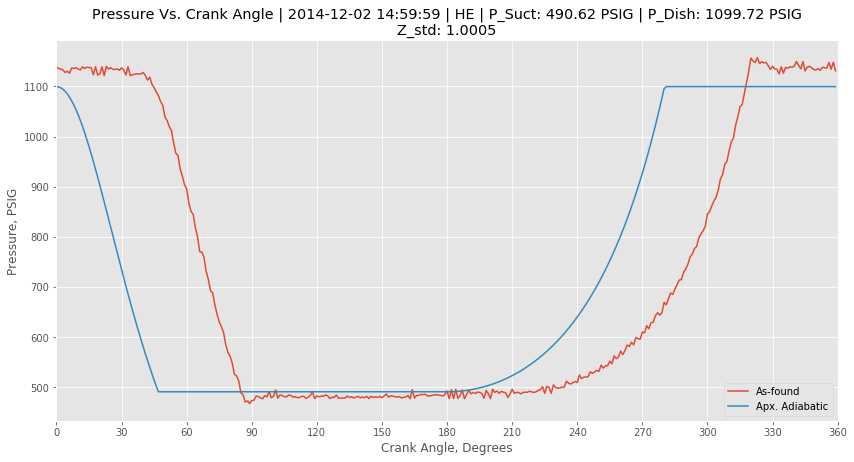

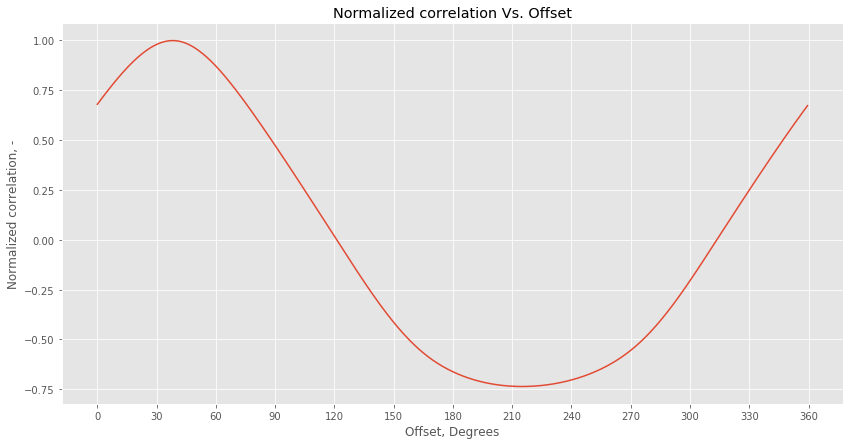

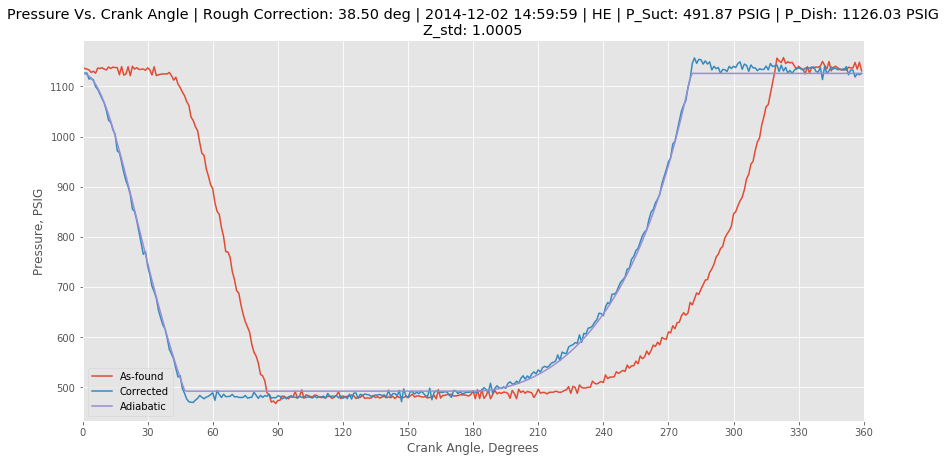

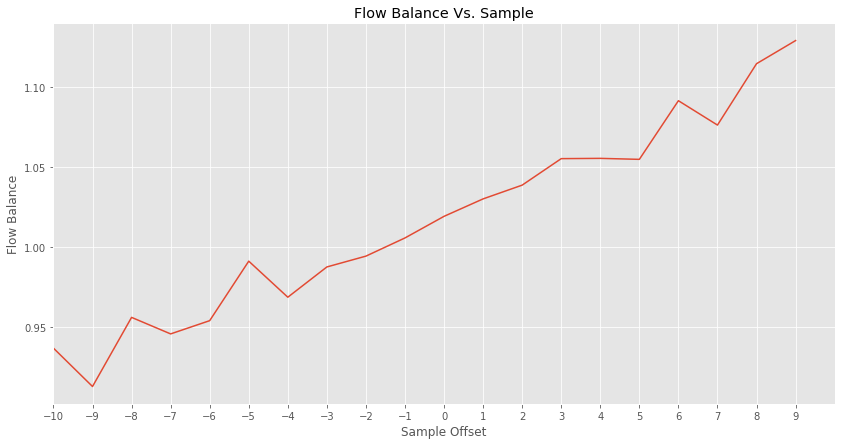

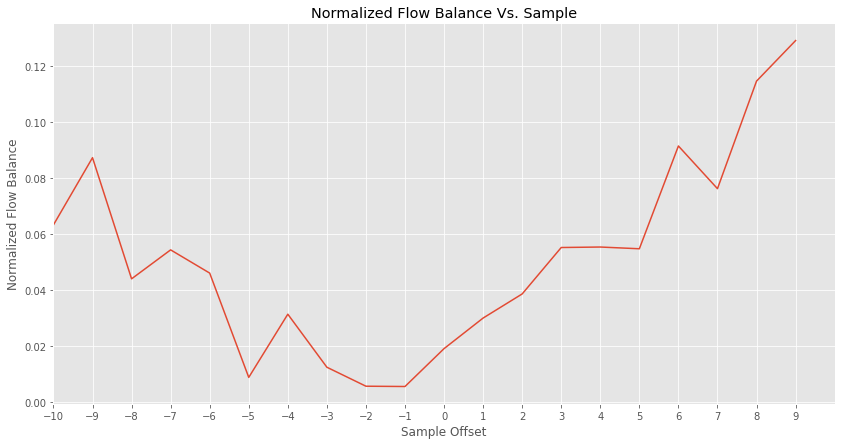

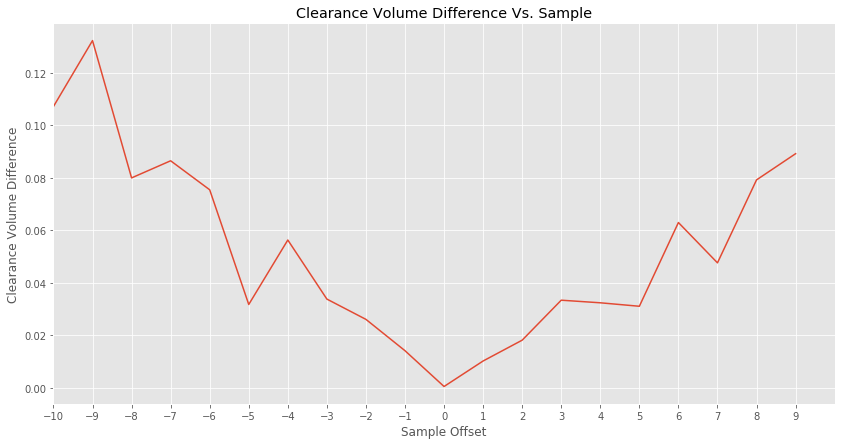

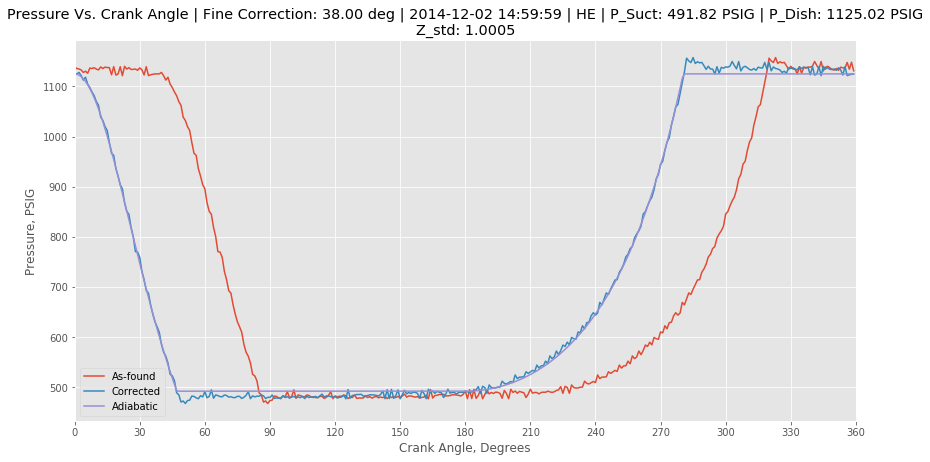

In [98]:
idxIndexFile = 3;
bDebug = True
iOffset = 39
iInterp = 2
dAngleCorrected, dPress = auto_tdc(idxIndexFile, iOffset, iInterp, bDebug, bDebug_Verbose=True)